In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("dark")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Models
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from utils import learning_curve_plotter, model_param_curve, metrics

In [2]:
# base param
seed = 712

In [3]:
# Load Dataset

diabet_path = "./data/diabetes.csv"
df_diabet = pd.read_csv(diabet_path)

# EDA

In [4]:
df_diabet.head()
df_diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
len(df_diabet)

768

Outcome
0          500
1          268
dtype: int64


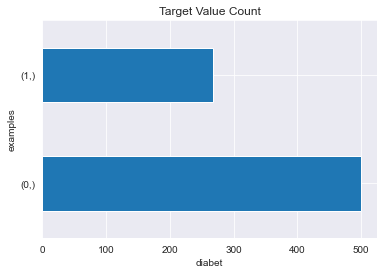

In [6]:
# visualize target value

target_cnt = df_diabet[["Outcome"]].value_counts()
print(target_cnt)

target_cnt.plot(kind='barh', title="Target Value Count")
plt.xlabel("diabet")
plt.ylabel("examples")
plt.grid()
plt.show()

In [7]:
target_cnt / len(df_diabet)

Outcome
0          0.651042
1          0.348958
dtype: float64

In [8]:
df_diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df_diabet.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
target = 'Outcome'
features = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

train_df, test_df = train_test_split(df_diabet, test_size=0.2, random_state=712)
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# # data normalize 진행
# sc = StandardScaler()
# sc.fit(X_train_origin)

# X_train = sc.transform(X_train_origin)
# X_test = sc.transform(X_test_origin)

# for i in range(X_train.shape[1]):
#     print(f"Range after normalize feature {i}'s {min(X_train_origin[:, i])} ~ {max(X_train_origin[:, i])} to {min(X_train[:, i])} ~ {max(X_train[:, i])}")

# Decision Tree

- pruning 반드시 포함 - dept에 대한 조정 필요
- information gain (ID3, GINI)등을 사용할 필요는 없지만, 설명해야함
- DT의 dept에 따라 복잡도 명시

In [54]:
# Tree Pre-Pruning 작업 진행
# tree.export_text(tree_clf)
tree_clf = tree.DecisionTreeClassifier(random_state=seed)

params = {
    'max_depth': [2,4,8,16,32,64,128],
    'criterion': ['gini', 'entropy']
}

"""
that macro weighs each class equally whereas micro weights each sample equally. If the distribution of classes is symmetrical (i.e. you have an equal number of samples for each class), then macro and micro will result in the same score.
https://datascience.stackexchange.com/questions/45974/micro-f1-and-macro-f1-are-equal-in-binary-classification-and-i-dont-know-why
"""

tree_grid_search = GridSearchCV(estimator=tree_clf, param_grid=params,
                                return_train_score=True,
                           verbose=3, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=712), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128]},
             return_train_score=True, verbose=3)

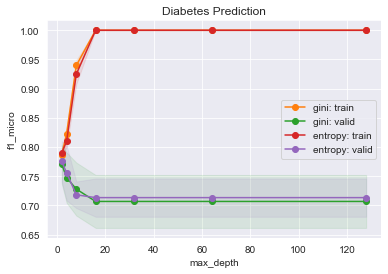

[CV 2/5] END alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.7, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.7, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.7, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.7, max_iter=50;, score=(train=0.659, test=0.656) total time=   0.0s
[CV 1/5] END alpha=0.001, hidden_layer_sizes=10, learning_rate_init=1, max_iter=1;, score=(train=0.342, test=0.341) total time=   0.0s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=10, learning_rate_init=1, max_iter=1;, score=(train=0.342, test=0.341) total time=   0.0s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.5, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END alpha=0.001, hidden_layer_si

[CV 5/5] END alpha=0.001, hidden_layer_sizes=30, learning_rate_init=0.5, max_iter=30;, score=(train=0.659, test=0.656) total time=   0.0s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=50, learning_rate_init=0.1, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=50, learning_rate_init=0.1, max_iter=50;, score=(train=0.660, test=0.659) total time=   0.1s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=50, learning_rate_init=0.1, max_iter=50;, score=(train=0.659, test=0.656) total time=   0.1s
[CV 1/5] END alpha=0.001, hidden_layer_sizes=50, learning_rate_init=0.3, max_iter=1;, score=(train=0.546, test=0.512) total time=   0.0s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=50, learning_rate_init=0.3, max_iter=1;, score=(train=0.462, test=0.431) total time=   0.0s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=50, learning_rate_init=0.3, max_iter=1;, score=(train=0.487, test=0.463) total time=   0.0s
[CV 4/5] END alpha=0.001, hidden_laye

In [99]:
# grid_search.best_score_

tree_grid_search.cv_results_.keys()
tree_grid_search_result_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_grid_search_result_df.sort_values(by="rank_test_score")

gini_df = tree_grid_search_result_df[tree_grid_search_result_df['param_criterion'].str.contains('gini')]
entropy_df = tree_grid_search_result_df[tree_grid_search_result_df['param_criterion'].str.contains('entropy')]

x_range=params['max_depth']
x_label="max_depth"
y_label="f1_micro"
title="Diabetes Prediction"

gini_mean_train = gini_df["mean_train_score"]
gini_std_train = gini_df["std_train_score"]

gini_mean_test = gini_df["mean_test_score"]
gini_std_test = gini_df["std_test_score"]

entropy_mean_train = entropy_df["mean_train_score"]
entropy_std_train = entropy_df["std_train_score"]

entropy_mean_test = entropy_df["mean_test_score"]
entropy_std_test = entropy_df["std_test_score"]

plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.plot(x_range, gini_mean_train, marker='o', label='gini: train', color=f"C{1}")
plt.fill_between(x_range, gini_mean_train+gini_std_train,
            gini_mean_train-gini_std_train, color=f'C{1}', alpha=0.1)
plt.plot(x_range, gini_mean_test, marker='o', label='gini: valid', color=f"C{2}")
plt.fill_between(x_range, gini_mean_test+gini_std_test,
         gini_mean_test-gini_std_test, color=f"C{2}", alpha=0.1)

plt.plot(x_range, entropy_mean_train, marker='o', label='entropy: train', color=f"C{3}")
plt.fill_between(x_range, entropy_mean_train+entropy_std_train,
            entropy_mean_train-entropy_std_train, color=f'C{3}', alpha=0.1)
plt.plot(x_range, entropy_mean_test, marker='o', label='entropy: valid', color=f"C{4}")
plt.fill_between(x_range, entropy_mean_test+entropy_std_test,
         entropy_mean_test-entropy_std_test, color=f"C{4}", alpha=0.1)

plt.legend()
plt.show()

In [58]:
# search for the best param
best_params = tree_grid_search_result_df["params"][np.argmax(tree_grid_search_result_df['mean_test_score'])]
best_score = np.max(tree_grid_search_result_df['mean_test_score'])

print(best_params, best_score)

{'criterion': 'entropy', 'max_depth': 2} 0.7752765560442489


In [59]:
# best parameter tester
best_tree_clf = tree.DecisionTreeClassifier(
    max_depth=2,
    random_state=seed,
    criterion='gini'
)

best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=712)

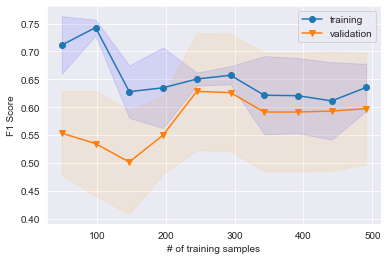

In [60]:
# Learning Curve Analysis

learning_curve_plotter(best_tree_clf, X_train, y_train)

In [61]:
# Test Set Performance

metrics(X_train, y_train, X_test, y_test, best_tree_clf)

train / test metrics - tr_roc: 0.746876473361622, tr_f1: 0.6648936170212766, test_roc: 0.632183908045977, test_f1: 0.5050505050505051


(0.746876473361622, 0.6648936170212766, 0.632183908045977, 0.5050505050505051)

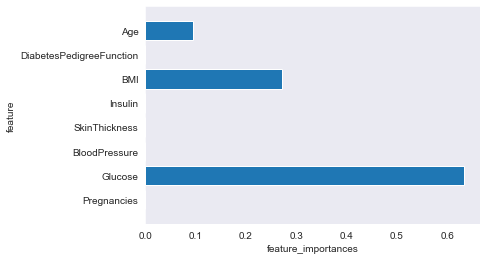

In [62]:
# feature importance

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features),
            model.feature_importances_,
            align='center')
    plt.yticks(np.arange(n_features),
              features)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.show()
    
plot_feature_importances(best_tree_clf)

# feature별 importance 매핑
# for name, value in zip(features , best_tree_clf.feature_importances_):
#     print('{} : {:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기
# sns.barplot(x=best_tree_clf.feature_importances_ , y=y_train)

## Neural Network

- actvation function & nn layer의 다양성 분석
- Learning rate와 momentum을 조정하여 NN의 학습을 빠르게할 수있음 (trade-off)는 있음
- Regularization은 overfitting을 방지 할 수 있음

In [39]:
nn_params = {
    "learning_rate_init": [0.1, 0.3, 0.5, 0.7, 1],
    "hidden_layer_sizes": [2, 5, 10, 30, 50, 100],
    "max_iter": [1, 5, 10, 20, 30, 40, 50]
}

nn_clf = MLPClassifier(random_state=seed)
nn_clf.fit(X_train, y_train)

nn_grid_search = GridSearchCV(estimator=nn_clf, param_grid=nn_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
nn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/a

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/a

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/a

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/ana

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/a

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/an

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/an

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/a

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/an

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/a

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/an

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/ana

GridSearchCV(estimator=MLPClassifier(random_state=712), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [2, 5, 10, 30, 50, 100],
                         'learning_rate_init': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_iter': [1, 5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [40]:
nn_grid_search.cv_results_.keys()
nn_grid_search_df = pd.DataFrame(nn_grid_search.cv_results_)
nn_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
110,0.078611,0.003436,0.002862,0.000355,30,0.1,40,"{'hidden_layer_sizes': 30, 'learning_rate_init...",0.691057,0.723577,...,0.708410,0.032447,1,0.723014,0.749491,0.743381,0.694501,0.672764,0.716630,0.029155
111,0.097253,0.005171,0.003047,0.000470,30,0.1,50,"{'hidden_layer_sizes': 30, 'learning_rate_init...",0.707317,0.731707,...,0.705158,0.028017,2,0.757637,0.749491,0.745418,0.690428,0.691057,0.726806,0.029708
109,0.060187,0.004441,0.003211,0.001161,30,0.1,30,"{'hidden_layer_sizes': 30, 'learning_rate_init...",0.674797,0.715447,...,0.697028,0.026400,3,0.702648,0.735234,0.708758,0.682281,0.666667,0.699117,0.023436
76,0.076167,0.014701,0.002933,0.000225,10,0.1,50,"{'hidden_layer_sizes': 10, 'learning_rate_init...",0.666667,0.658537,...,0.685619,0.047634,4,0.761711,0.672098,0.737271,0.659878,0.658537,0.697899,0.043088
75,0.065164,0.008581,0.003073,0.000567,10,0.1,40,"{'hidden_layer_sizes': 10, 'learning_rate_init...",0.682927,0.658537,...,0.677489,0.024912,5,0.747454,0.672098,0.696538,0.659878,0.658537,0.686901,0.033207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.005346,0.001573,0.002913,0.000445,2,0.7,1,"{'hidden_layer_sizes': 2, 'learning_rate_init'...",0.341463,0.341463,...,0.342023,0.001120,204,0.342159,0.342159,0.342159,0.342159,0.341463,0.342020,0.000278
162,0.014323,0.002741,0.003288,0.000670,50,0.7,5,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.341463,0.341463,...,0.342023,0.001120,204,0.342159,0.342159,0.342159,0.342159,0.341463,0.342020,0.000278
155,0.014464,0.002873,0.003572,0.001083,50,0.5,5,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.341463,0.341463,...,0.342023,0.001120,204,0.342159,0.342159,0.342159,0.342159,0.341463,0.342020,0.000278
91,0.006315,0.001941,0.003381,0.001453,10,0.7,1,"{'hidden_layer_sizes': 10, 'learning_rate_init...",0.341463,0.341463,...,0.342023,0.001120,204,0.342159,0.342159,0.342159,0.342159,0.341463,0.342020,0.000278


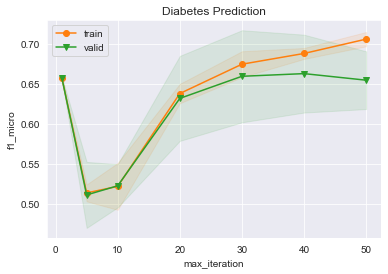

[CV 4/5] END learning_rate_init=0.1;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 2/5] END learning_rate_init=0.7;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 1/5] END ...alpha=0.001;, score=(train=0.786, test=0.659) total time=   0.6s
[CV 4/5] END hidden_layer_sizes=5;, score=(train=0.589, test=0.610) total time=   0.3s
[CV 5/5] END hidden_layer_sizes=30;, score=(train=0.736, test=0.721) total time=   0.4s
[CV 5/5] END ....max_iter=5;, score=(train=0.526, test=0.459) total time=   0.0s
[CV 4/5] END ...max_iter=30;, score=(train=0.648, test=0.764) total time=   0.1s
[CV 5/5] END learning_rate_init=0.3;, score=(train=0.659, test=0.656) total time=   0.1s
[CV 3/5] END learning_rate_init=1;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 2/5] END ...alpha=1e-05;, score=(train=0.729, test=0.724) total time=   0.5s
[CV 3/5] END ....alpha=0.01;, score=(train=0.752, test=0.756) total time=   0.4s
[CV 3/5] END hidden_layer_sizes=2;, score=(train=0.658, test=0.659

[CV 1/5] END learning_rate_init=0.5;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.750, test=0.689) total time=   0.3s
[CV 5/5] END ...alpha=0.001;, score=(train=0.746, test=0.689) total time=   0.3s
[CV 4/5] END hidden_layer_sizes=2;, score=(train=0.658, test=0.659) total time=   0.3s
[CV 5/5] END hidden_layer_sizes=10;, score=(train=0.638, test=0.582) total time=   0.3s
[CV 3/5] END hidden_layer_sizes=100;, score=(train=0.739, test=0.748) total time=   0.3s
[CV 4/5] END ....max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END ...max_iter=20;, score=(train=0.642, test=0.593) total time=   0.1s
[CV 2/5] END ...max_iter=40;, score=(train=0.690, test=0.585) total time=   0.1s


In [38]:
# draw hyperparam tunning

# model_param_curve(nn_grid_search_df, "learning_rate_init", nn_params, "learning_rate_init", "nn_lr.png", "Diabetes Prediction")
# model_param_curve(nn_grid_search_df, "L2 penalty(alpha)", nn_params, "alpha", "nn_l2.png", "Diabetes Prediction")
# model_param_curve(nn_grid_search_df, "hidden layer size", nn_params, "hidden_layer_sizes", "nn_hidden.png", "Diabetes Prediction")
model_param_curve(nn_grid_search_df, "max_iteration", nn_params, "max_iter", "nn_max_iter.png", "Diabetes Prediction")

In [41]:
# search for the best param
best_params = nn_grid_search_df["params"][np.argmax(nn_grid_search_df['mean_test_score'])]
best_score = np.max(nn_grid_search_df['mean_test_score'])

print(best_params, best_score)

{'hidden_layer_sizes': 30, 'learning_rate_init': 0.1, 'max_iter': 40} 0.7084099693455951


In [43]:
# # best parameter tester
best_nn_clf = MLPClassifier(
    random_state=seed,
    hidden_layer_sizes=30,
    learning_rate_init=0.1,
    max_iter=40
)

best_nn_clf.fit(X_train, y_train)

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=40,
              random_state=712)

In [45]:
# Learning Curve Analysis

learning_curve_plotter(best_nn_clf, X_train, y_train, save_name="nn_lr.png")

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

In [46]:
metrics(X_train, y_train, X_test, y_test, best_nn_clf)

train / test metrics - tr_roc: 0.5758250825082508, tr_f1: 0.33561643835616445, test_roc: 0.5547772988505746, test_f1: 0.3170731707317073


(0.5758250825082508,
 0.33561643835616445,
 0.5547772988505746,
 0.3170731707317073)

[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 5/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=10;, score=(train=0.659, test=0.656) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=40;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=5;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=20;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=1;, score=(train=0.656, test=0.659) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 4/5] END 

[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=20;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 4/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=40;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 5/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=1;, score=(train=0.659, test=0.656) total time=   0.0s
[CV 4/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=20;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 4/5] E

[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 4/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=10;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 5/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=30;, score=(train=0.659, test=0.656) total time=   0.0s
[CV 4/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=1;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=10;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=40;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=40;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=30;, score=(train=0.658, test=0.659) total time=   0.1s
[CV 4/5] E

[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=10;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 4/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=20;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=50;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=10;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.3, max_iter=30;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=5;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=5;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=2, learning_rate_init=0.5, max_iter=30;, score=(train=0.658, test=0.659) total time=   0.0s
[CV 2/5] E

## Boosting
- bias와 varience의 영향을 가장 적게 받을 것임

In [17]:
boosting_params = {
    "n_estimators":[1, 2, 3, 5, 10, 20, 30, 50, 100]
}

ada_clf = AdaBoostClassifier(random_state=seed)

ada_grid_search = GridSearchCV(estimator=ada_clf, param_grid=boosting_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(random_state=712), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 3, 5, 10, 20, 30, 50, 100]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [18]:
ada_grid_search.cv_results_.keys()
ada_grid_search_result_df = pd.DataFrame(ada_grid_search.cv_results_)
ada_grid_search_result_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.007468,0.000606,0.003309,0.000367,2,{'n_estimators': 2},0.715447,0.804878,0.772358,0.780488,...,0.763814,0.030651,1,0.788187,0.792261,0.792261,0.790224,0.762195,0.785026,0.011515
3,0.012440,0.000736,0.004341,0.001163,5,{'n_estimators': 5},0.723577,0.756098,0.764228,0.772358,...,0.760629,0.021134,2,0.800407,0.780041,0.794297,0.804481,0.778455,0.791536,0.010556
4,0.021476,0.001483,0.004747,0.000642,10,{'n_estimators': 10},0.699187,0.796748,0.739837,0.756098,...,0.752472,0.032549,3,0.810591,0.798371,0.794297,0.816701,0.794715,0.802935,0.009068
2,0.008949,0.000856,0.004370,0.001388,3,{'n_estimators': 3},0.658537,0.804878,0.772358,0.780488,...,0.752432,0.050584,4,0.780041,0.792261,0.792261,0.790224,0.762195,0.783396,0.011528
6,0.061511,0.002367,0.011182,0.002648,30,{'n_estimators': 30},0.634146,0.829268,0.796748,0.731707,...,0.750833,0.066893,5,0.847251,0.796334,0.814664,0.845214,0.821138,0.824920,0.019221
5,0.040296,0.001766,0.007690,0.001532,20,{'n_estimators': 20},0.650407,0.796748,0.788618,0.723577,...,0.744329,0.053449,6,0.841141,0.792261,0.814664,0.824847,0.798780,0.814339,0.017654
7,0.109020,0.001459,0.015422,0.005733,50,{'n_estimators': 50},0.634146,0.788618,0.780488,0.731707,...,0.737812,0.055591,7,0.863544,0.826884,0.826884,0.863544,0.831301,0.842431,0.017314
0,0.005170,0.000505,0.003290,0.000621,1,{'n_estimators': 1},0.658537,0.756098,0.707317,0.772358,...,0.729681,0.041658,8,0.780041,0.741344,0.753564,0.723014,0.760163,0.751625,0.019018
8,0.160641,0.008955,0.013403,0.001102,100,{'n_estimators': 100},0.609756,0.772358,0.772358,0.707317,...,0.723177,0.061497,9,0.881874,0.861507,0.857434,0.883910,0.865854,0.870116,0.010786


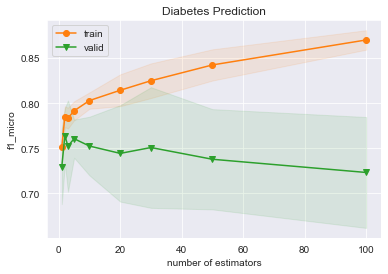

In [19]:
# draw hyperparam tunning

model_param_curve(ada_grid_search_result_df, "number of estimators", boosting_params, "n_estimators", "boost_estimators.png", "Diabetes Prediction")

In [20]:
best_params = ada_grid_search_result_df["params"][np.argmax(ada_grid_search_result_df['mean_test_score'])]
best_score = np.max(ada_grid_search_result_df['mean_test_score'])

print(best_params)

# param_list = [i for i in ada_grid_search_result_df.keys() if i.startswith("param_")]
# new_df = pd.DataFrame(ada_grid_search_result_df, columns=[i for i in ada_grid_search_result_df.keys() if i != 'params'])
# new_df2 = new_df.set_index(param_list)
# new_df3 = new_df2.drop(axis=1, labels=[i for i in new_d
# f2.columns if i.startswith("split")])

{'n_estimators': 2}


In [21]:
# # best parameter tester

best_ada_clf = AdaBoostClassifier(
    random_state=seed,
    n_estimators=2
)

best_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=2, random_state=712)

In [22]:
# Learning Curve Analysis

learning_curve_plotter(best_ada_clf, X_train, y_train)

In [76]:
metrics(X_train, y_train, X_test, y_test, best_ada_clf)

train / test metrics - tr_roc: 0.7453559641678453, tr_f1: 0.6632124352331606, test_roc: 0.6442169540229885, test_f1: 0.5294117647058822


(0.7453559641678453,
 0.6632124352331606,
 0.6442169540229885,
 0.5294117647058822)

In [26]:
# grad_clf = GradientBoostingClassifier(
#     learning_rate=0.1,
#     n_estimators=1000,
#     max_depth = 3, # no more than 5 usually
#     max_features=0.6,
#     subsample=0.7,
#     random_state=seed
# )
# grad_clf.fit(X_train, y_train)

# score(X_train, y_train, X_test, y_test, grad_clf)
# metrics(y_test, grad_clf.predict(X_test))

GradientBoostingClassifier(max_features=0.6, n_estimators=1000,
                           random_state=712, subsample=0.7)

## SVM

In [85]:
svm_params = {
    "kernel":["linear", "rbf"],
    "C": [0.001, 0.01, 0.1, 1, 10]
}

svm_clf = svm.SVC(random_state=seed)

svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


SVC(random_state=712)

In [86]:
svm_grid_search.cv_results_.keys()
svm_grid_search_df = pd.DataFrame(svm_grid_search.cv_results_)
svm_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,2.372474,0.612847,0.002358,0.000398,1,linear,"{'C': 1, 'kernel': 'linear'}",0.723577,0.804878,0.747967,...,0.778569,0.036531,1,0.794297,0.775967,0.790224,0.775967,0.770325,0.781356,0.009229
8,15.727062,3.637827,0.002202,0.000136,10,linear,"{'C': 10, 'kernel': 'linear'}",0.723577,0.804878,0.756098,...,0.778555,0.033569,2,0.794297,0.773931,0.794297,0.771894,0.768293,0.780542,0.011375
4,0.377376,0.063676,0.003665,0.000691,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.723577,0.804878,0.739837,...,0.775303,0.036267,3,0.792261,0.778004,0.790224,0.773931,0.762195,0.779323,0.011049
2,0.050837,0.006520,0.003628,0.000442,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.723577,0.804878,0.739837,...,0.773664,0.034748,4,0.796334,0.771894,0.792261,0.775967,0.762195,0.779730,0.012773
0,0.012034,0.001280,0.003270,0.000426,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.715447,0.813008,0.715447,...,0.768772,0.043908,5,0.794297,0.769857,0.788187,0.769857,0.770325,0.778505,0.010579
9,0.013457,0.005555,0.006361,0.001212,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.707317,0.821138,0.731707,...,0.760589,0.039337,6,0.800407,0.780041,0.792261,0.792261,0.786585,0.790311,0.006766
7,0.010613,0.000919,0.007720,0.001678,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.731707,0.780488,0.739837,...,0.758950,0.022249,7,0.786151,0.763747,0.784114,0.769857,0.784553,0.777684,0.009118
5,0.012906,0.001107,0.008261,0.001299,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.658537,0.691057,0.691057,...,0.684046,0.012793,8,0.710794,0.702648,0.682281,0.692464,0.680894,0.693816,0.011560
1,0.013144,0.001312,0.008829,0.001666,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.658537,0.658537,0.658537,...,0.657977,0.001120,9,0.657841,0.657841,0.657841,0.657841,0.658537,0.657980,0.000278
3,0.015014,0.002143,0.010097,0.001084,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.658537,0.658537,0.658537,...,0.657977,0.001120,9,0.657841,0.657841,0.657841,0.657841,0.658537,0.657980,0.000278


In [92]:
def model_param_curve_multi(grid_search_result_df, x_label, params, param_name, save_fig_name):

    x_range=params[param_name]
    x_label=x_label
    y_label="f1_micro"
    title="Diabet Prediction"
            
    linear_df = grid_search_result_df[grid_search_result_df['param_kernel'].str.contains('linear')]
    rbf_df = grid_search_result_df[grid_search_result_df['param_kernel'].str.contains('rbf')]

    linear_mean_train = linear_df["mean_train_score"]
    linear_mean_test = linear_df["mean_test_score"]
    linear_std_train = linear_df["std_train_score"]
    linear_std_test = linear_df["std_test_score"]
    
    rbf_mean_train = rbf_df["mean_train_score"]
    rbf_mean_test = rbf_df["mean_test_score"]
    rbf_std_train = rbf_df["std_train_score"]
    rbf_std_test = rbf_df["std_test_score"]

    #Plotting
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.plot(x_range, linear_mean_train, marker='o', label='linear train', color=f"C{1}")
    plt.fill_between(x_range, linear_mean_train+linear_std_train,
            linear_mean_train-linear_std_train, color=f'C{1}', alpha=0.1)
    plt.plot(x_range, linear_mean_test, marker='o', label='linear valid', color=f"C{2}")
    plt.fill_between(x_range, linear_mean_test+linear_std_test,
             linear_mean_test-linear_std_test, color=f"C{2}", alpha=0.1)
    plt.plot(x_range, rbf_mean_train, marker='v', label='rbf train', color=f"C{3}")
    plt.fill_between(x_range, rbf_mean_train+rbf_std_train,
             rbf_mean_train-rbf_std_train, color=f"C{3}", alpha=0.1)
    plt.plot(x_range, rbf_mean_test, marker='v', label='rbf valid', color=f"C{4}")
    plt.fill_between(x_range, rbf_mean_test+rbf_std_test,
             rbf_mean_test-rbf_std_test, color=f"C{4}", alpha=0.1)

    plt.legend()
    plt.savefig(save_fig_name)
    plt.show()

[0.001, 0.01, 0.1, 1, 10]


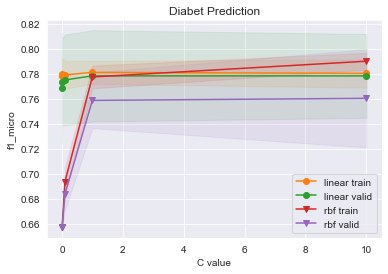

In [94]:
# draw hyperparam tunning

# linear_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('linear')]
# rbf_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('rbf')]

model_param_curve_multi(svm_grid_search_df, "C value", svm_params, "C", "svm_C_estimators.png")

In [95]:
best_params = svm_grid_search_df["params"][np.argmax(svm_grid_search_df['mean_test_score'])]
best_score = np.max(svm_grid_search_df['mean_test_score'])

print(best_params)

{'C': 1, 'kernel': 'linear'}


In [96]:
# # best parameter tester

best_svm_clf = svm.SVC(
    random_state=seed,
    C=1,
    kernel="linear"
)

best_svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=712)

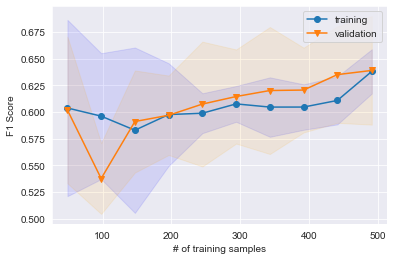

In [97]:
# Learning Curve Analysis

learning_curve_plotter(best_svm_clf, X_train, y_train)

In [101]:
metrics(X_train, y_train, X_test, y_test, best_svm_clf)

train / test metrics - tr_roc: 0.7311645450259311, tr_f1: 0.6419098143236074, test_roc: 0.6961206896551724, test_f1: 0.6000000000000001


(0.7311645450259311,
 0.6419098143236074,
 0.6961206896551724,
 0.6000000000000001)

## K-NN

In [11]:
knn_params = {
    "n_neighbors": [1, 2, 3, 5, 10, 30, 50]
}

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 30, 50]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [12]:
# https://idkim97.github.io/machine%20learning/MachineLearning_SVM/
knn_grid_search.cv_results_.keys()
knn_grid_search_df = pd.DataFrame(knn_grid_search.cv_results_)
knn_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.002658,0.000247,0.009441,0.000919,30,{'n_neighbors': 30},0.715447,0.788618,0.747967,0.723577,...,0.744302,0.025464,1,0.763747,0.755601,0.753564,0.759674,0.758130,0.758143,0.003498
6,0.003449,0.000743,0.009462,0.001168,50,{'n_neighbors': 50},0.691057,0.780488,0.739837,0.764228,...,0.742663,0.030303,2,0.765784,0.751527,0.769857,0.759674,0.745935,0.758556,0.008831
4,0.003222,0.001385,0.009205,0.001095,10,{'n_neighbors': 10},0.731707,0.780488,0.715447,0.731707,...,0.736132,0.023040,3,0.810591,0.784114,0.800407,0.786151,0.780488,0.792350,0.011354
1,0.003308,0.000276,0.010643,0.002655,2,{'n_neighbors': 2},0.691057,0.691057,0.739837,0.723577,...,0.718286,0.023401,4,0.845214,0.843177,0.824847,0.845214,0.829268,0.837544,0.008707
3,0.002947,0.000748,0.010321,0.002618,5,{'n_neighbors': 5},0.674797,0.723577,0.707317,0.682927,...,0.710183,0.031300,5,0.822811,0.792261,0.808554,0.806517,0.802846,0.806598,0.009862
0,0.004544,0.002125,0.022941,0.016662,1,{'n_neighbors': 1},0.617886,0.634146,0.764228,0.682927,...,0.695575,0.065712,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.003145,0.000445,0.010290,0.004105,3,{'n_neighbors': 3},0.593496,0.699187,0.707317,0.682927,...,0.687405,0.052578,7,0.841141,0.839104,0.835031,0.841141,0.827236,0.836730,0.005245


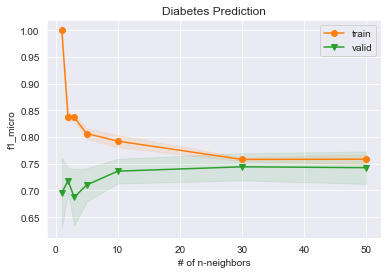

In [13]:
# draw hyperparam tunning
model_param_curve(knn_grid_search_df, "# of n-neighbors", knn_params, "n_neighbors", "knn_n_neighbors.png", "Diabetes Prediction")

In [14]:
# params
best_params = knn_grid_search_df["params"][np.argmax(knn_grid_search_df['mean_test_score'])]
best_score = np.max(knn_grid_search_df['mean_test_score'])
print(best_params)

{'n_neighbors': 30}


In [15]:
# best parameter tester

best_knn_clf = KNeighborsClassifier(
    n_neighbors=30
)

best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [16]:
# Learning Curve Analysis

learning_curve_plotter(best_knn_clf, X_train, y_train)

In [84]:
metrics(X_train, y_train, X_test, y_test, best_knn_clf)

train / test metrics - tr_roc: 0.6937293729372938, tr_f1: 0.5764705882352941, test_roc: 0.682471264367816, test_f1: 0.5652173913043479


(0.6937293729372938, 0.5764705882352941, 0.682471264367816, 0.5652173913043479)